# **PMR3508 - Exercício Programa 02**: <br> **Redes Neurais e o Dataset MNIST**
---
---

## ✏️ **Cabeçalho**:

### **Nome**: `Luan Tavares de Andrade`
### **NUSP**: `12542904`
### **Hash**: `97`

---

## 📜 **Descrição:**

Neste exercício, você irá trabalhar com o **dataset MNIST**, um conjunto de dados com 70.000 imagens de dígitos escritos à mão. Seu objetivo será aplicar os conceitos de **Redes Neurais Artificiais (ANNs)** vistos na aula teórica. Este EP está dividido em tarefas, sua formatação não deve ser alterada, mas novas células de código ou texto podem ser criadas nos blocos de cada tarefa.

---

## ⚠️ **Instruções:**
- Complete todas as tarefas abaixo, respondendo às perguntas e escrevendo o código necessário.
- Comente seu código para facilitar a correção.
- Entregue o notebook no formato `.ipynb`.

---



## ✅ **Tarefas:**

1. **Probabilidades de dígitos no *dataset***       ⇒ `2 pontos`
2. **Análise Exploratória de Dados (EDA)**          ⇒ `2 pontos`
3. **Treinamento e teste de Modelos**               ⇒ `2 pontos`
4. **Comunicação de Resultados e Visualizações**    ⇒ `2 pontos`
5. **Publicação no *Kaggle* e Documentação**        ⇒ `2 pontos`

---

<br>
<center>
        <h1>
        <b>
        BOA SORTE !!!
        </b>
        </h1>
</center>
<br>

---
---

## ⏳ Loading dos Dados

In [168]:
import pickle
import random
import numpy as np
import os
from os.path import join

# Configuração de seeds para replicabilidade
np.random.seed(42)  # Seed para NumPy
random.seed(42)     # Seed para o módulo random

input_path = os.getcwd()  # Obtém o diretório atual
images_filepath = join(input_path, 'MNIST-images.pkl')
labels_filepath = join(input_path, 'MNIST-labels.pkl')
validation_images_filepath = join(input_path, 'MNIST-validation-images.pkl')

with open(images_filepath, 'rb') as f:
    X_tot = pickle.load(f)

with open(labels_filepath, 'rb') as f:
    y_tot = pickle.load(f)

with open(validation_images_filepath, 'rb') as f:
    X_val = pickle.load(f)

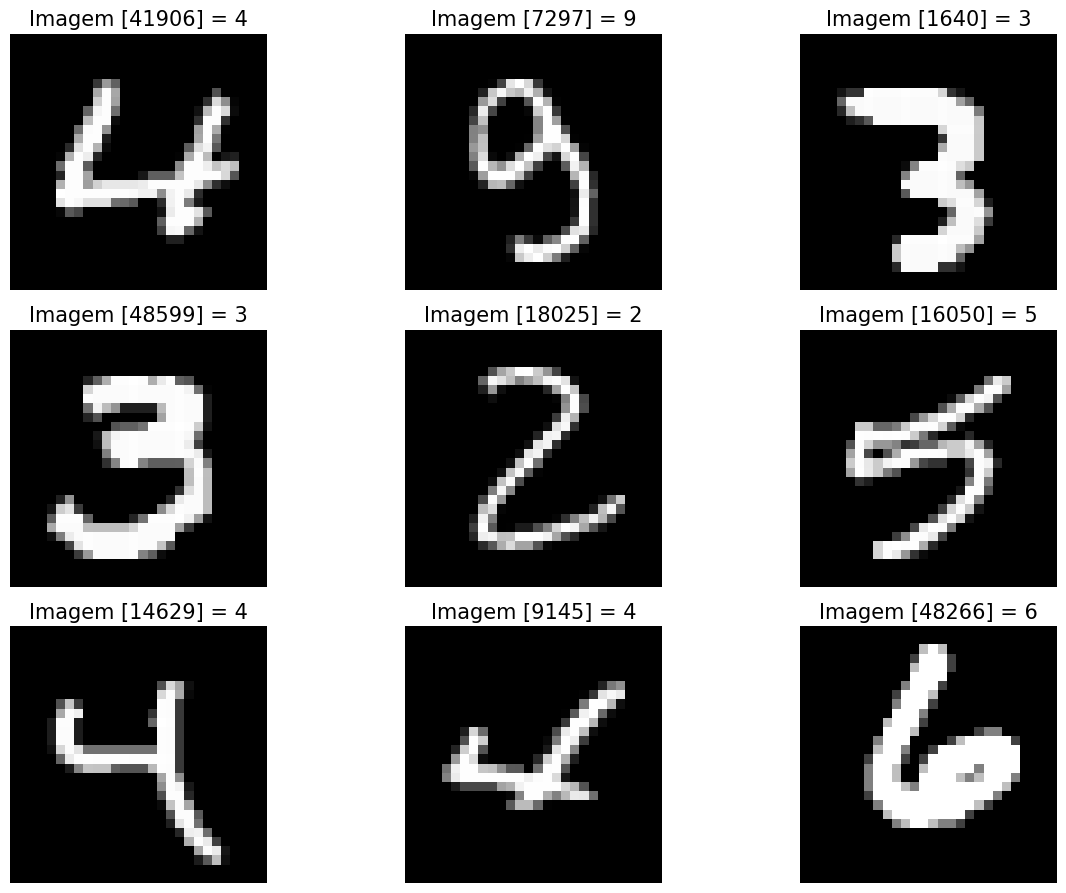

In [57]:
'''
TESTE DE CARREGAMENTO DO DATASET POR VISUALIZAÇÃO
Este bloco visualiza algumas imagens do dataset MNIST para verificar se o
carregamento foi realizado corretamente.
'''

%matplotlib inline
import random
import matplotlib.pyplot as plt

def show_images(images, title_texts):
    # Função para mostrar as imagens com seus respectivos títulos
    cols = 3  # Número de colunas na visualização
    rows = int(len(images) / cols) + 1  # Calcula o número de linhas
    plt.figure(figsize=(12, 12))  # Define o tamanho da figura
    index = 1
    for x in zip(images, title_texts):  # Itera sobre as imagens e títulos
        image = x[0]
        title_text = x[1]
        plt.subplot(rows, cols, index)  # Adiciona um subplot
        plt.axis('off')  # Desativa os eixos
        plt.imshow(image, cmap=plt.cm.gray)  # Mostra a imagem em escala de cinza
        if (title_text != ''):
            plt.title(title_text, fontsize=15)  # Define o título da imagem
        index += 1
    plt.tight_layout()  # Ajusta o layout para evitar sobreposição de títulos
    plt.show()  # Exibe a figura com as imagens e títulos

images_2_show = []  # Lista para armazenar as imagens a serem mostradas
titles_2_show = []  # Lista para armazenar os títulos das imagens
# Seleciona aleatoriamente 9 imagens de treino
for i in range(0, 9):
    r = random.randint(1, 60000)
    images_2_show.append(X_tot[r])  # Adiciona a imagem selecionada à lista
    titles_2_show.append(f"Imagem [{str(r)}] = {str(y_tot[r])}")  # Adiciona o título correspondente

show_images(images_2_show, titles_2_show)  # Exibe as imagens selecionadas

# 0️⃣ Suas bibliotecas

In [58]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 1️⃣ Tarefa 01: Probabilidades 🎲

## 🧑🏻‍💻 Item a)

Descubra o número do Dataset associado ao seu Hash.


In [59]:
num_hash = 97 # Número hash
num_sort = y_tot[num_hash] # Número sorteado baseado no hash
img_sort = X_tot[num_hash] # Imagem sorteada baseada no hash

In [60]:
print(f'Número sorteado para análise probabilística: {num_sort}')

Número sorteado para análise probabilística: 0


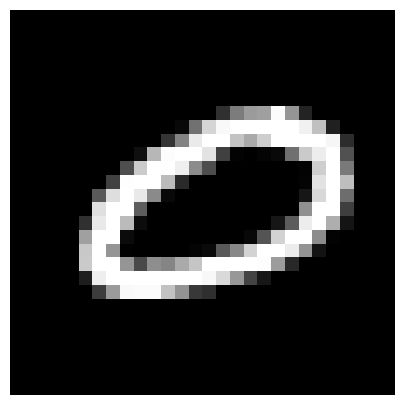

In [61]:
plt.figure(figsize=(5, 5))
plt.axis('off')
plt.imshow(img_sort, cmap=plt.cm.gray)

## 🔦 Item b)

Determine, para a imagem vinculada ao seu Hash, qual é a Probabilidade de um píxel claro (128 - 225) para esta única imagem?

#### Para determinar a probabilidade de um pixel claro na nossa imagem iremos:
- #### Transformar nossa imagem inicialmente que está em formato de matrix em um vetor;
- #### Para cada índice do vetor verificar se o pixel correspondente esta no intervalo desejado (128-255);
- #### Calcular a proporção entre os pixels encontrados no item anterior e o total de pixels (784)

In [62]:
#Transformação da nossa imagem em um vetor

img_vec = np.array(img_sort).flatten()

img_vec

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [63]:
# Encontrar os pixels claros na imagem

valores_claros = img_vec[img_vec>=128]
indices_claros = np.where(img_vec>=128)[0]

print(f' Indices dos pixeis claros na imagem \n\n{indices_claros}\n')

print(f' Valores dos pixeis claros na imagem \n\n{valores_claros}')


 Indices dos pixeis claros na imagem 

[213 214 215 216 238 239 240 241 242 243 244 245 246 264 265 266 267 268
 269 270 271 272 273 274 275 290 291 292 293 294 301 302 303 317 318 319
 320 321 330 331 344 345 346 347 358 359 360 371 372 373 374 386 387 398
 399 400 413 414 415 426 427 428 441 442 443 453 454 455 467 468 469 470
 481 482 483 492 493 494 495 496 497 509 510 511 512 514 515 516 517 518
 519 520 521 522 523 538 539 540 541 542 543 544 545 546 547 548 567 568
 569 570 571 572]

 Valores dos pixeis claros na imagem 

[154 158 251 148 212 248 254 254 254 254 254 240 191 130 233 254 254 195
 168 204 254 254 254 254 245 182 251 254 254 226 201 236 254 202 254 254
 238 139 205 254 253 254 254 186 225 254 189 221 254 232 137 215 254 222
 254 254 143 254 254 232 254 186 236 254 173 159 254 254 209 254 254 139
 199 254 148 135 211 254 254 235 146 201 254 254 148 141 132 169 196 254
 254 254 254 252 155 237 254 254 254 254 254 254 254 247 216 150 153 248
 250 250 193 146]


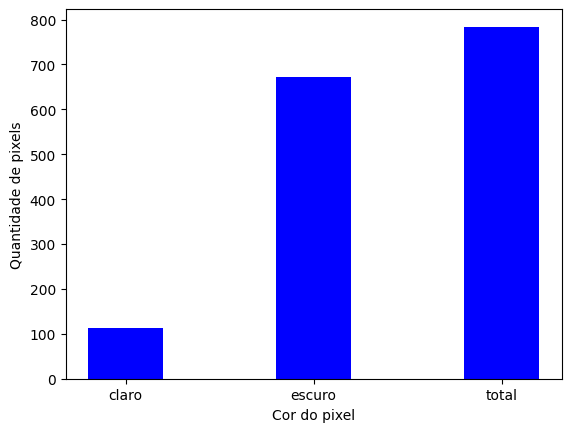

Proporção de pixels claros na imagem sorteada: 0.1429
Probabilidade de pixels claros na imagem sorteada: 14.29%


In [64]:
# Calcular a proporção de pixels claros na imagem

qtd_claros = len(indices_claros)

tam_img = len(img_vec)

cor_pixel = ['claro', 'escuro', 'total']

plt.bar(cor_pixel,[qtd_claros,tam_img-qtd_claros,tam_img],color='blue',width = 0.4)
plt.xlabel("Cor do pixel")
plt.ylabel("Quantidade de pixels")
plt.show()

print(f'Proporção de pixels claros na imagem sorteada: {qtd_claros/tam_img:.4f}')


print(f'Probabilidade de pixels claros na imagem sorteada: {qtd_claros*100/tam_img:.2f}%')


## ♟️ Item c)

Qual é a probabilidade de um píxel ser claro dentre todos os píxeis que tem a mesma classe que a sua imagem obtida em a)?

#### Para calcular essa probabilidade iremos executar um processo semelhante ao item anterior, mas dessa vez para todas as imagens que possuem nossa classe desejada (Número 0).

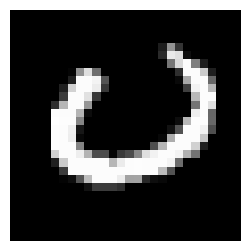

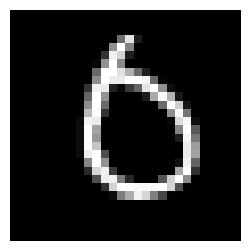

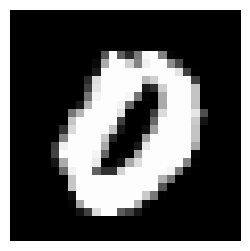

In [65]:
imagens_classe = X_tot[y_tot == 0] # imagens com nossa classe desejada

# imprimindo algumas para verificar se o valor está correto
for x in range(100,103):
    plt.figure(figsize=(3, 3))
    plt.axis('off')
    plt.imshow(imagens_classe[x], cmap=plt.cm.gray)

In [66]:
imagens_classe_vec = [matriz.flatten() for matriz in imagens_classe] # Imagens com classe 0 transforamadas em vetor

qtd_claros_classe = sum((imagens_classe_vec > 128).sum() for imagens_classe_vec in imagens_classe) # Quantidade dos pixels claros em todas as imagens com classe 0

qtd_total_classe = len(imagens_classe)*tam_img

print(qtd_claros_classe)

804200


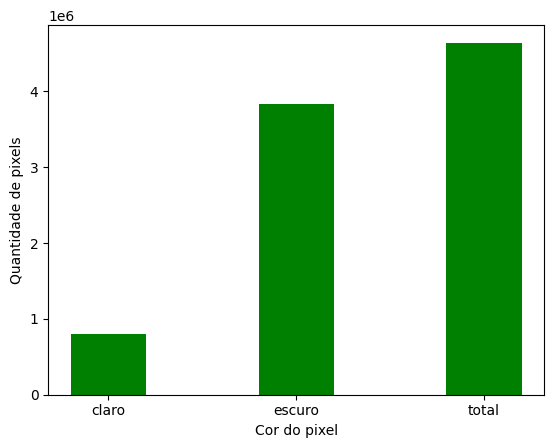

Proporção de pixels claros na classe sorteada: 0.1733
Probabilidade de pixels claros na classe sorteada: 17.33%


In [67]:
plt.bar(cor_pixel,[qtd_claros_classe,qtd_total_classe-qtd_claros_classe,qtd_total_classe],color='green',width = 0.4)
plt.xlabel("Cor do pixel")
plt.ylabel("Quantidade de pixels")
plt.show()

print(f'Proporção de pixels claros na classe sorteada: {qtd_claros_classe/qtd_total_classe:.4f}')


print(f'Probabilidade de pixels claros na classe sorteada: {qtd_claros_classe*100/qtd_total_classe:.2f}%')

---

# 2️⃣ Tarefa 02: Análise Exploratória de Dados 📊

## ✨ Item a)

Conte quantas vezes cada dígito (de 0 a 9) aparece e responda:

1. Todos os dígitos aparecem a mesma quantidade?

2. Qual o valor médio dos píxeis de cada dígito?

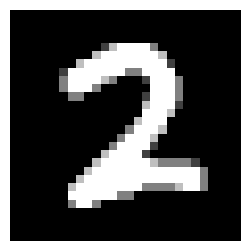

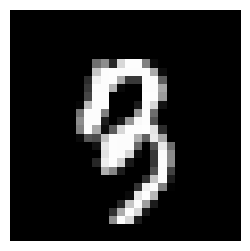

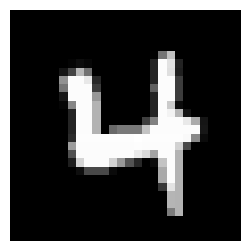

In [68]:
# Separando os dígitos

classe = []
for i in range(0,10):
    classe.append(X_tot[y_tot == i]) # classe[n] irá guardar todas as imagens com classe n

# Verificando alguns valores
for x in range(2,5):
    plt.figure(figsize=(3, 3))
    plt.axis('off')
    plt.imshow(classe[x][100], cmap=plt.cm.gray)

Quantidade do dígito 0: 5920
Quantidade do dígito 1: 6725
Quantidade do dígito 2: 6023
Quantidade do dígito 3: 6107
Quantidade do dígito 4: 5918
Quantidade do dígito 5: 5376
Quantidade do dígito 6: 5915
Quantidade do dígito 7: 6238
Quantidade do dígito 8: 5856
Quantidade do dígito 9: 5922


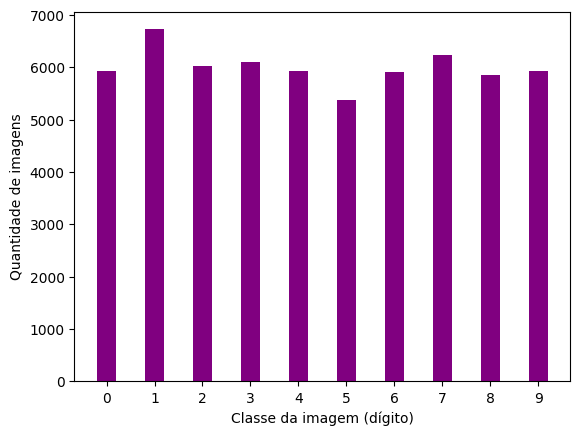

In [69]:
# Contando quantas vezes aparece cada dígito

qtd_digito = []
for i in range(0,10):
    qtd_digito.append(len(classe[i]))
    print(f'Quantidade do dígito {i}: {len(classe[i])}')

plt.bar(range(0,10),qtd_digito,color='purple',width = 0.4)
plt.xlabel("Classe da imagem (dígito)")
plt.ylabel("Quantidade de imagens")
plt.xticks(range(0, 10))
plt.show()


Valor médio de pixel para o digito 0: 44.2282
Valor médio de pixel para o digito 1: 19.4027
Valor médio de pixel para o digito 2: 38.0212
Valor médio de pixel para o digito 3: 36.2322
Valor médio de pixel para o digito 4: 31.0416
Valor médio de pixel para o digito 5: 32.9240
Valor médio de pixel para o digito 6: 35.2435
Valor médio de pixel para o digito 7: 29.2555
Valor médio de pixel para o digito 8: 38.4030
Valor médio de pixel para o digito 9: 31.3396


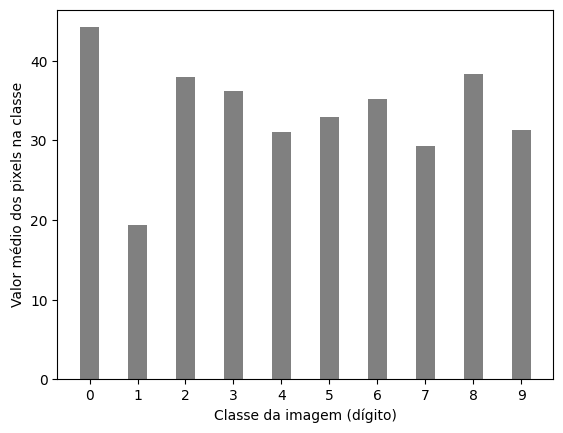

In [70]:
# Contando o valor médio dos pixels para cada dígito

qtd_media_digito = []

for i in range(0,10):
    qtd_media_digito.append(np.sum(classe[i])/(tam_img*qtd_digito[i]))
    print(f'Valor médio de pixel para o digito {i}: {qtd_media_digito[i]:.4f}')

plt.bar(range(0,10),qtd_media_digito,color='gray',width = 0.4)
plt.xlabel("Classe da imagem (dígito)")
plt.ylabel("Valor médio dos pixels na classe")
plt.xticks(range(0, 10))
plt.show()



### Resposta 01: Apesar de não aparecerem em exata mesma quantidade, os dígitos estão igualmente distribuídos nos nossos dados, com uma média de aproximadamente 6000 imagens de cada dígito.

### Resposta 02: Dados os seguintes resultados, podemos concluir que o número mais "claro" é o 0 e o mais "escuro" é o 1, possivelmente pela quantidade de pixels utilizada em cada um.
Valor médio de pixel para o digito 0 : 44.2282

Valor médio de pixel para o digito 1 : 19.4027

Valor médio de pixel para o digito 2 : 38.0212

Valor médio de pixel para o digito 3 : 36.2322

Valor médio de pixel para o digito 4 : 31.0416

Valor médio de pixel para o digito 5 : 32.9240

Valor médio de pixel para o digito 6 : 35.2435

Valor médio de pixel para o digito 7 : 29.2555

Valor médio de pixel para o digito 8 : 38.4030

Valor médio de pixel para o digito 9 : 31.3396


## 📏 Item b)

Faça um histograma que mostre a distribuição dos valores dos píxeis para cada dígito. Há muitos valores que são “apagados” (ou seja, com valor 0) ou a distribuição dos valores é mais equilibrada entre os dígitos?


#### Para a exibição dos histogramas, iremos transformas as imagens em vetores e concatenar os vetores de cada classe para trabalharmos apenas com os valores.

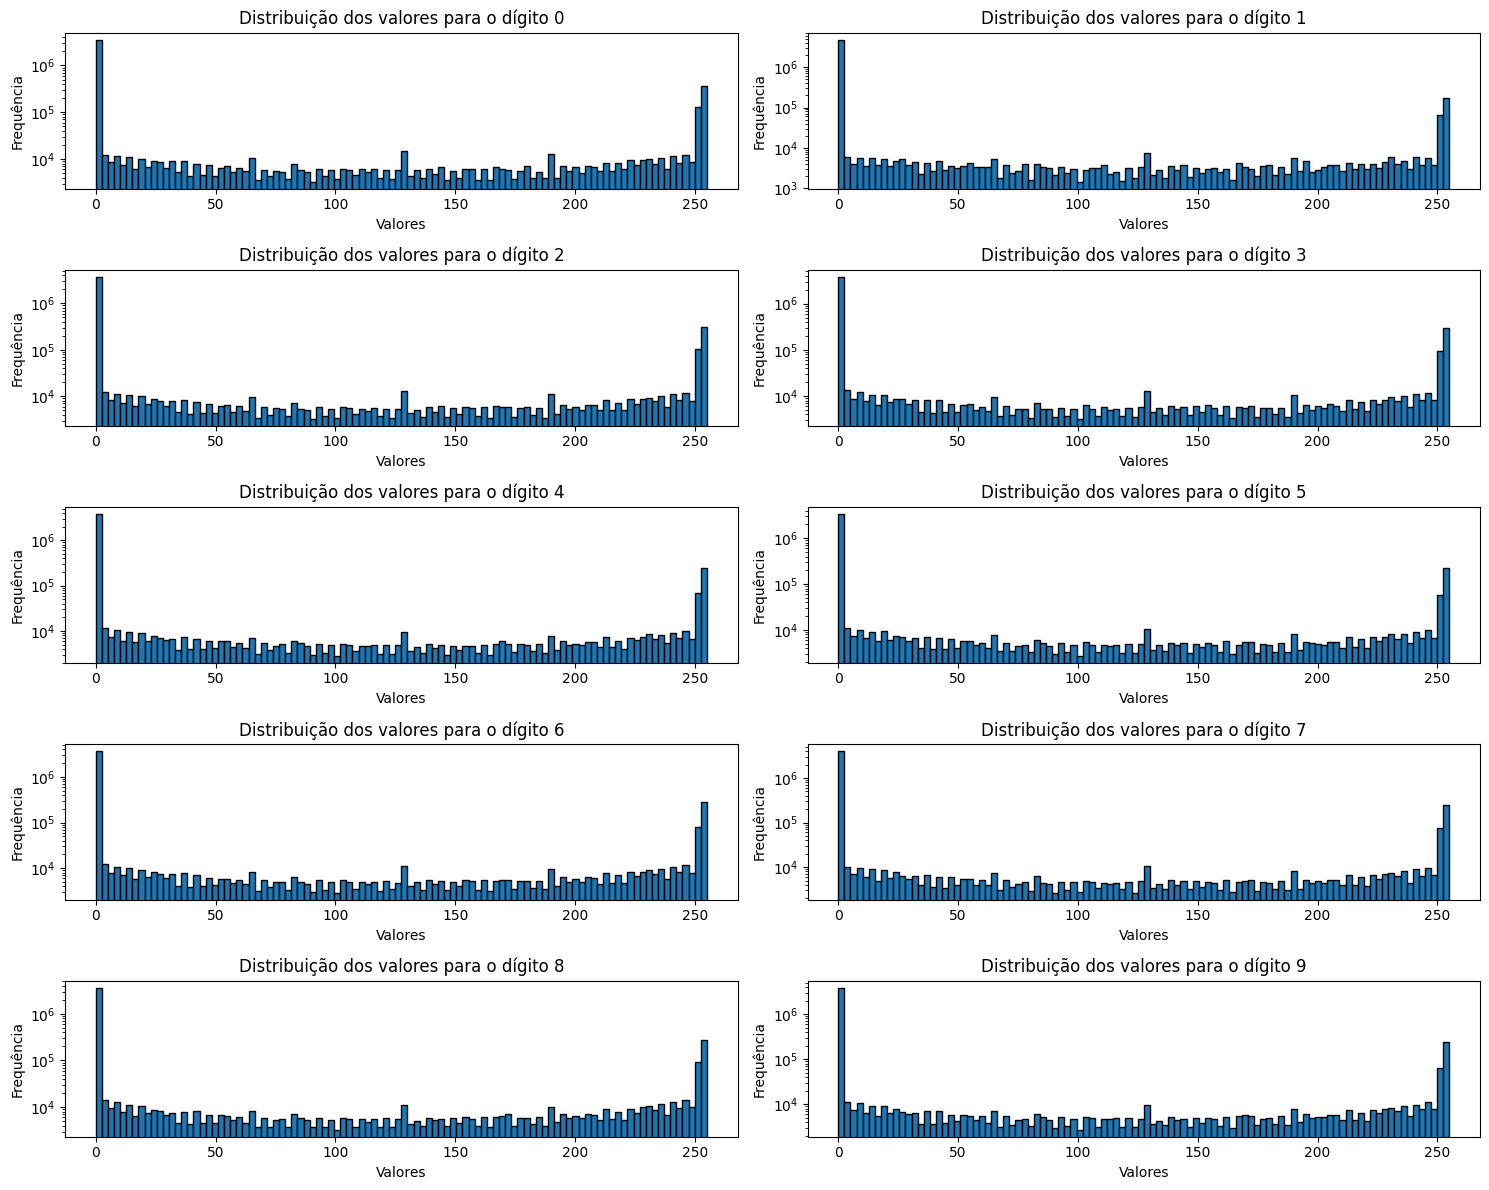

In [71]:
fig, axes = plt.subplots(5, 2, figsize=(15, 12))
classe_vec = []

for i in range(10):

    # Transformação e concatenação das matrizes
    classe_vec.append(np.concatenate([matriz.flatten() for matriz in classe[i]]))

    row, col = divmod(i, 2)
    ax = axes[row, col]

    ax.hist(classe_vec[i], bins=100, edgecolor='black')
    ax.set_yscale('log')
    ax.set_xlabel('Valores')
    ax.set_ylabel('Frequência')
    ax.set_title(f'Distribuição dos valores para o dígito {i}')

plt.tight_layout()
plt.show()

### Como pode ser visto, para todos os dígitos há muitos valores "apagados", portanto a distribuição dos valaores não é equilibrada.

## 🤓 Item c)

Crie uma imagem para cada dígito (de 0 a 9) em que cada píxel dessa nova imagem representa a média do valor dos píxeis para aquela classe. Você consegue reconhecer os dígitos nas imagens criadas?

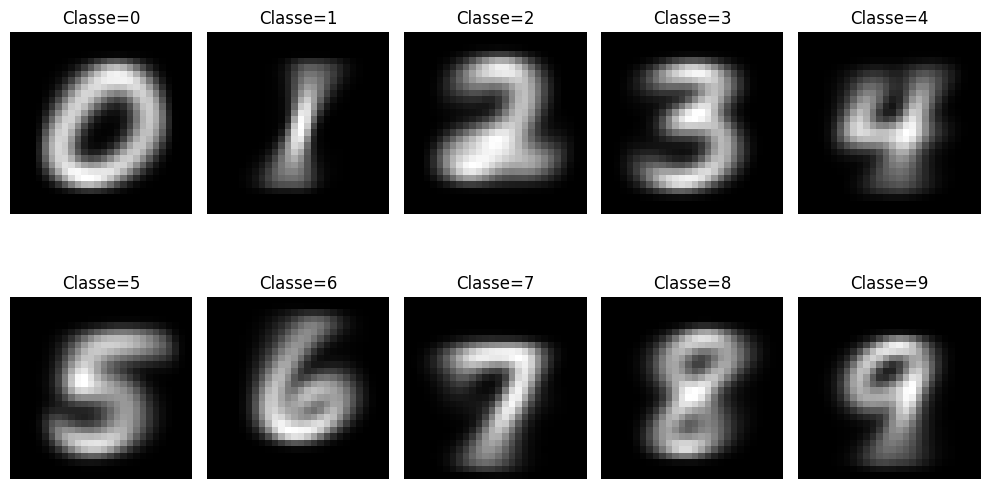

In [72]:
plt.figure(figsize=(10, 6))  # Define o tamanho da figura
index = 1
rows = 2
cols = 5
for x in classe:  # Itera sobre as imagens e títulos
    image = np.mean(x,axis=0)
    plt.subplot(rows, cols, index)  # Adiciona um subplot
    plt.axis('off')  # Desativa os eixos
    plt.title(f'Classe={index-1}')
    plt.imshow(image, cmap=plt.cm.gray)  # Mostra a imagem em escala de cinza
    index += 1
plt.tight_layout()  # Ajusta o layout para evitar sobreposição de títulos
plt.show()  # Exibe a figura com as imagens e títulos

### Sim, é possível reconhecer os dígitos nas imagens criadas pelas médias dos pixels

---

# 3️⃣ Tarefa 03: Treinamento e Teste de Modelos 🤖

## 📈 Item a)

Treine a ANN1 com 784 entradas, 8 neurônios na 1⁠ª camada oculta, 8 neurônios na 2⁠ª camada oculta e 10 saídas. Utilize 5 épocas para o treinamento. Use a biblioteca `scikit-learn`:

- Input Layer: 784 entradas (28x28);
- Hidden Layer 1: 8 neurônios;
- Hidden Layer 2: 8 neurônios;
- Output Layer: 10 saídas; (Classificador 0-9)
- Treine com 10 épocas.

In [73]:
# Importações necessárias do scikit-learn

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
import warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [74]:
# Ajuste nos dados para poder realizar o treinamento

X_tot_vec = X_tot.reshape(-1, 28 * 28) / 255 # Dados transformados em um 1d array e depois normalizados

#X_val_vec = X_val.reshape(-1, 28 * 28) / 255


X_train, X_test, y_train, y_test = train_test_split(X_tot_vec, y_tot, test_size=0.2, random_state=num_hash)


In [75]:
# Treinamento da primeira rede neural

hidden_layers = (8, 8) # Camadas ocultas
epochs = 10 # épocas para serem realizadas
ANN1 = MLPClassifier(hidden_layer_sizes=hidden_layers, max_iter=epochs, random_state=num_hash)

ANN1.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(8, 8), max_iter=10, random_state=97)

In [76]:
y_pred = ANN1.predict(X_test)
print("Resultados ANN1:\n", classification_report(y_test, y_pred))


Resultados ANN1:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94      1174
           1       0.95      0.97      0.96      1394
           2       0.91      0.90      0.90      1138
           3       0.93      0.88      0.91      1236
           4       0.91      0.91      0.91      1223
           5       0.90      0.86      0.88      1056
           6       0.92      0.95      0.94      1215
           7       0.93      0.93      0.93      1216
           8       0.86      0.87      0.86      1159
           9       0.87      0.90      0.88      1189

    accuracy                           0.91     12000
   macro avg       0.91      0.91      0.91     12000
weighted avg       0.91      0.91      0.91     12000



### Podemos ver que com o uso de uma rede neural para o treinamento, mesmo que pequena e simples, já conseguimos obter valores satisfatórios, como por exemplo 91% de acurácia.

## 📉 Item b)

Treine a ANN2 com 784 entradas, 256 neurônios na 1⁠ª camada oculta, 256 neurônios na 2⁠ª camada oculta, 256 neurônios na 3ª camada oculta, 256 neurônios na 4ª camada oculta e 10 saídas. Utilize 20 épocas dessa vez. Use a biblioteca `scikit-learn`.

- Input Layer: 784 entradas (28x28);
- Hidden Layer 1: 256 neurônios;
- Hidden Layer 2: 256 neurônios;
- Hidden Layer 3: 256 neurônios;
- Hidden Layer 4: 256 neurônios;
- Output Layer: 10 saídas; (Classificação 0-9)
- Treine com 20 épocas.

In [77]:
# Treinamento da primeira rede neural

hidden_layers = (256, 256, 256, 256) # Camadas ocultas
epochs = 20 # épocas para serem realizadas
ANN2 = MLPClassifier(hidden_layer_sizes=hidden_layers, max_iter=epochs, random_state=num_hash)

ANN2.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(256, 256, 256, 256), max_iter=20,
              random_state=97)

In [78]:
y_pred = ANN2.predict(X_test)
print("Resultados ANN2:\n", classification_report(y_test, y_pred))

Resultados ANN2:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1174
           1       0.98      0.99      0.99      1394
           2       0.98      0.98      0.98      1138
           3       0.98      0.96      0.97      1236
           4       0.99      0.98      0.98      1223
           5       0.97      0.98      0.98      1056
           6       0.99      0.98      0.98      1215
           7       0.98      0.98      0.98      1216
           8       0.97      0.97      0.97      1159
           9       0.96      0.98      0.97      1189

    accuracy                           0.98     12000
   macro avg       0.98      0.98      0.98     12000
weighted avg       0.98      0.98      0.98     12000



### Podemos ver que ao aumentar a quantidade de camadas, a quantidade de neurônios por camada e as épocas, conseguimos um resultado quase perfeito no treinamento da rede neural. Isso era esperado dado que estamos trabalhando com um problema relativamente simples e com poucas variáveis, mas utilizando uma rede muito maior que o necessário.

## ⚙️ Item c)

Agora você treinará um novo modelo, mais adequado. Para isso, gere ao menos 5 configurações de redes neurais, variando o número de camadas ocultas, o número de neurônios e o número de épocas. As configurações devem estar intermediárias entre `[8, 8]` e `[256, 256, 256, 256]`.

Utilize a função `GridSearchCV` para realizar uma busca exaustiva pelos hiperparâmetros e encontre a configuração que oferece o melhor classificador, justificando sua escolha com base nas métricas de validação.

In [79]:
hidden_layers = [(64), (32, 64), (8, 32, 128), (32, 32, 32, 32), (128, 64, 128)] # Camadas ocultas dos 5 modelos
epochs = [20] # épocas para serem realizadas

grid = {"hidden_layer_sizes" : hidden_layers,
        "max_iter" : epochs,
        "random_state" : [num_hash],
        }

In [80]:
grid_result = GridSearchCV(MLPClassifier(random_state=num_hash),grid,cv=3,n_jobs = -1, scoring="accuracy")

grid_result.fit(X_train, y_train)

c:\Users\pepol\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_search.py:412: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.array(param_list)


GridSearchCV(cv=3, estimator=MLPClassifier(random_state=97), n_jobs=-1,
             param_grid={'hidden_layer_sizes': [64, (32, 64), (8, 32, 128),
                                                (32, 32, 32, 32),
                                                (128, 64, 128)],
                         'max_iter': [20], 'random_state': [97]},
             scoring='accuracy')

In [81]:
print(f"Dos modelos selecionados, o que apresentou melhores resultados foi o com parâmetros {grid_result.best_params_}.\nEsse modelo teve como resultado uma acurácia de {grid_result.best_score_*100:.2f}%")

Dos modelos selecionados, o que apresentou melhores resultados foi o com parâmetros {'hidden_layer_sizes': (128, 64, 128), 'max_iter': 20, 'random_state': 97}.
Esse modelo teve como resultado uma acurácia de 97.16%


## 🔧 Item d)

Para os modelos treinados nas questões a) e b), além do classificador encontrado na questão c), compare o desempenho dos modelos, analisando se apresentam *underfitting* ou *overfitting*. Justifique com gráficos e análises.


In [82]:
# Treinando um modelo com os parâmetros encontrados anteriormente

hidden_layers = (128, 64, 128) # Camadas ocultas
epochs = 20 # épocas para serem realizadas
ANN3 = MLPClassifier(hidden_layer_sizes=hidden_layers, max_iter=epochs, random_state=num_hash)

ANN3.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(128, 64, 128), max_iter=20, random_state=97)

In [83]:
# Função para plotar um gráfico da acurácia de um modelo com o passar das épocas
# para medir a progressão de desempenho dele
def learning(hl,epochs,model):

    classes = np.unique(y_train)
    train_accuracy = []
    test_accuracy = []

    ANN = MLPClassifier(hidden_layer_sizes=hl, max_iter=1, warm_start=True, random_state=num_hash)

    # Utilizar o partial_fit para fazer um treinamento progressivo do modelo para ter acesso aos
    # dados de cada época
    for epoch in range(epochs):
        ANN.partial_fit(X_train, y_train, classes=classes)
        # Calcula acurácia para a época atual
        train_pred = ANN.predict(X_train)
        test_pred = ANN.predict(X_test)
        acc = accuracy_score(y_train, train_pred)
        acc_test = accuracy_score(y_test, test_pred)
        train_accuracy.append(acc)
        test_accuracy.append(acc_test)

    plt.figure(figsize=(10, 6))
    plt.plot(range(1, epochs + 1), train_accuracy, marker='o', label="Train Accuracy")
    plt.plot(range(1, epochs + 1), test_accuracy, marker='o', label="Test Accuracy")
    plt.title(f"Acurácia com o passar das épocas (ANN{model})")
    plt.xlabel("Época")
    plt.ylabel("Acurácia")
    plt.legend()
    plt.grid(True)
    plt.show()


In [84]:
# Evitar mostrar os avisos de não convergencia do modelo
warnings.filterwarnings("ignore", category=ConvergenceWarning)


# Função para gerar a Loss Curve do treino e teste de um modelo
def losscurve(hl, epochs, model):

    #Modelo genérico com apenas 1 época
    ANN = MLPClassifier(hidden_layer_sizes=hl, max_iter=1, warm_start=True, random_state=num_hash)

    # Array para guardar o test loss de cada época
    ANN_test_loss = []

    # Treina o modelo de 1 época por epochs vezes
    for epoch in range(epochs):

        ANN.fit(X_train, y_train)
        
        # Armazena o test loss
        ANN_test_loss.append(log_loss(y_test, ANN.predict_proba(X_test)))
    
    plt.figure(figsize=(12, 6))
    plt.plot(ANN.loss_curve_, marker='*', label=f"ANN{model} Train Loss")
    plt.plot(ANN_test_loss, marker='o', linestyle='--', label=f"ANN{model} Test Loss")

    plt.title(f"Loss Curve (ANN{model})")
    plt.xlabel("Iteração")
    plt.ylabel("Loss")
    plt.legend()
    plt.grid(True)
    plt.show()

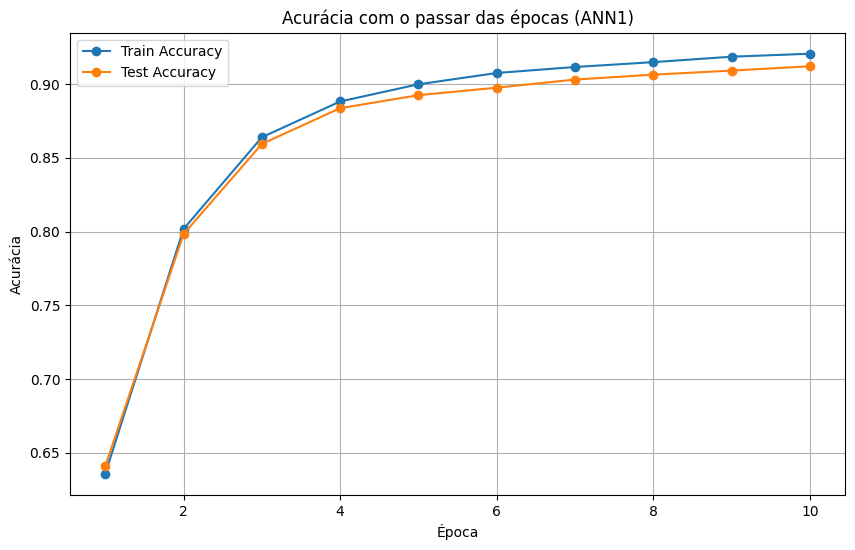

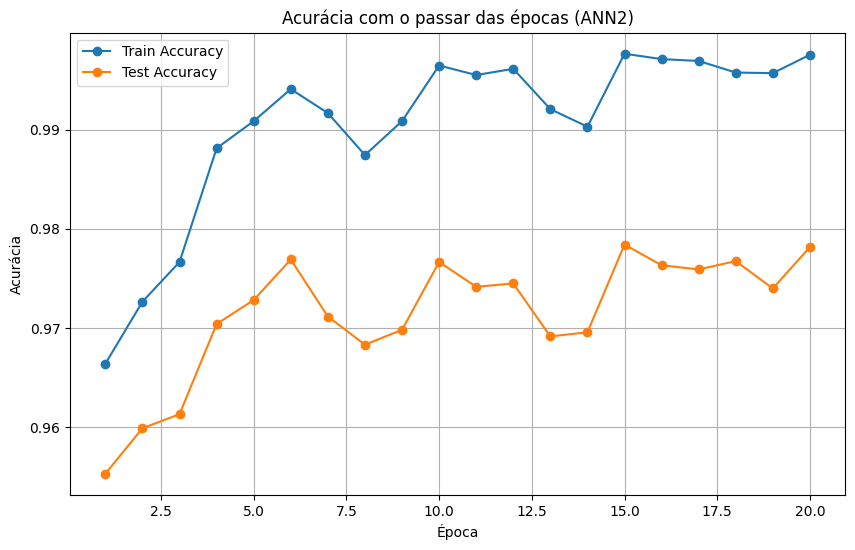

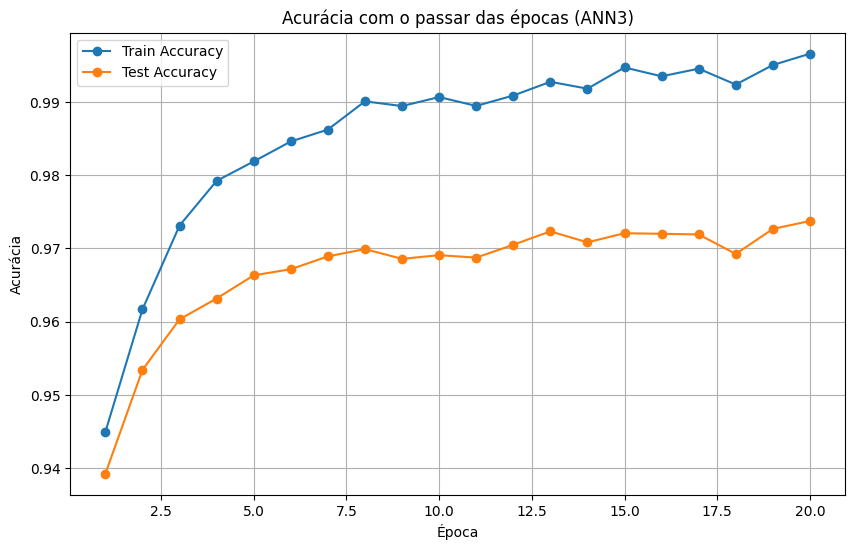

In [85]:
learning((8,8),10,1) #ANN1
learning((256,256,256,256),20,2) #ANN2
learning((128,64,128),20,3) #ANN3

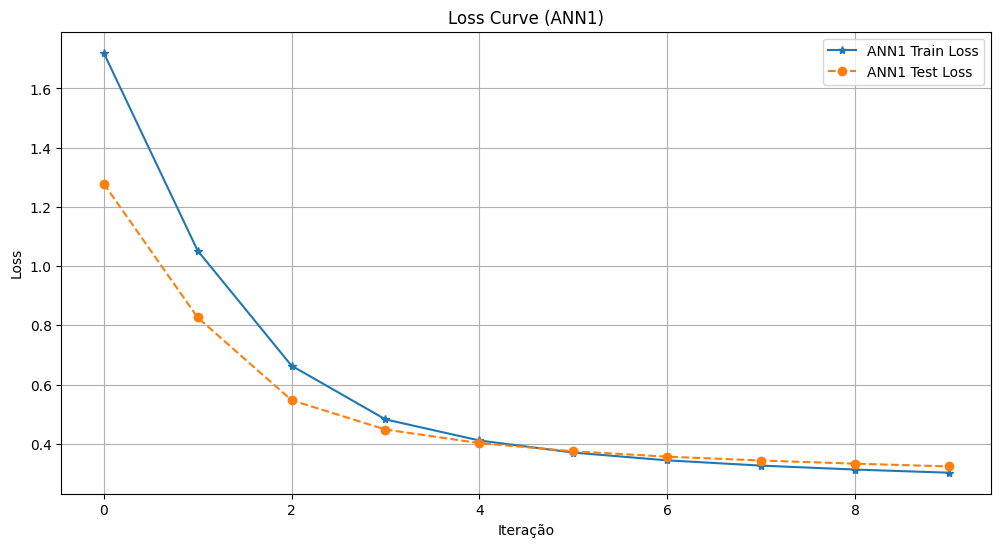

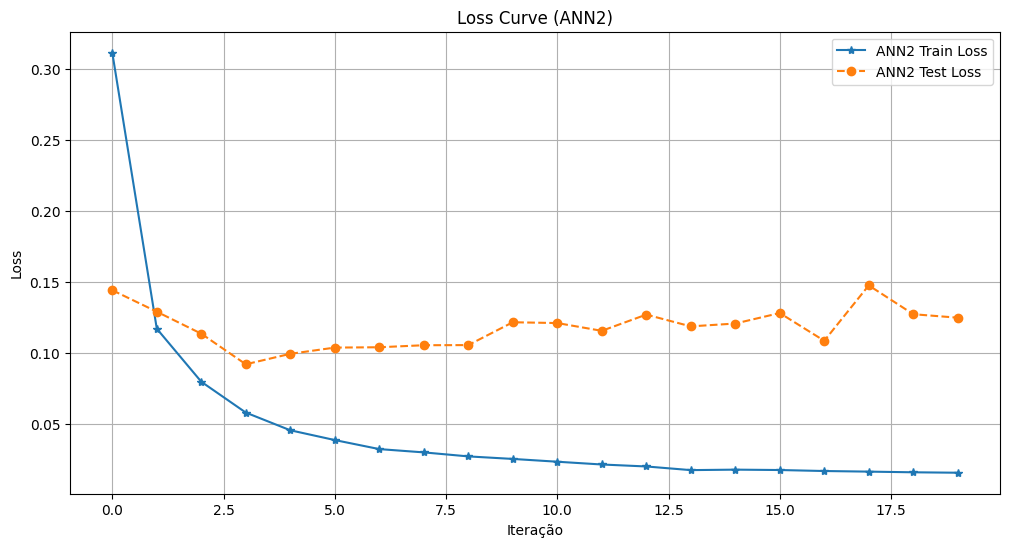

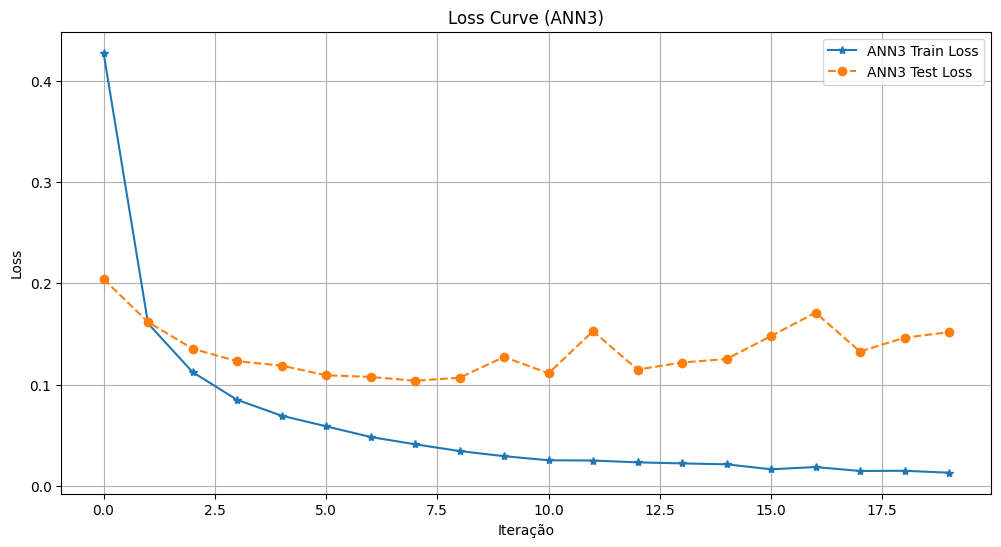

In [86]:
# Loss curve para os 3 modelos
losscurve((8,8),10,1) #ANN1
losscurve((256,256,256,256),20,2) #ANN2
losscurve((128,64,128),20,3) #ANN3

### Das estatísticas e gráficos obtidos, podemos observar que tanto o segundo modelo treinado (ANN2) quanto o melhor encontrado (ANN3) apresentam alta acurácia tanto no conjunto de treino quanto no conjunto de teste, porém é visto que ambos apresentam uma perda que cresce a partir de um ponto no gráfico do conjunto de teste, o que pode representar um Overfitting em ambos os modelos, pois estão desempenhando quase perfeitamente no conjunto de treino, o que resulta em um vício nele e no comportamento citado anteriomente;

### O primeiro modelo treinado (ANN1), apesar de apresentar menores valores de acurácia quando comparado aos outros, nos mostra um comprtamento de acurácia esperado de um modelo que não possui Overfitting, dado que os valores de perda dos conjuntos de treino e teste são similares, demonstrando capacidade de generalização. Porém, ao analisar o gráfico de acurácia, podemos ver que o modelo não atinge valores altos nem para o conjunto de treino, o que nos pode indicar um possível Underfitting.

---

# 4️⃣ Tarefa 04: Resultados e Visualizações 🤞🏻

## 🐳 Item a)

Gere e apresente uma matriz de confusão que mostre a distribuição das previsões do melhor modelo. Quais as métricas de Acurácia, Precisão, Recall e F1-Score para esse modelo?


Resultados para ANN3:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98      1174
           1       0.99      0.98      0.99      1394
           2       0.94      0.99      0.96      1138
           3       0.96      0.97      0.97      1236
           4       0.98      0.97      0.98      1223
           5       0.98      0.92      0.95      1056
           6       0.99      0.97      0.98      1215
           7       0.97      0.98      0.98      1216
           8       0.95      0.98      0.97      1159
           9       0.94      0.97      0.96      1189

    accuracy                           0.97     12000
   macro avg       0.97      0.97      0.97     12000
weighted avg       0.97      0.97      0.97     12000

Acurácia para ANN3: 0.97


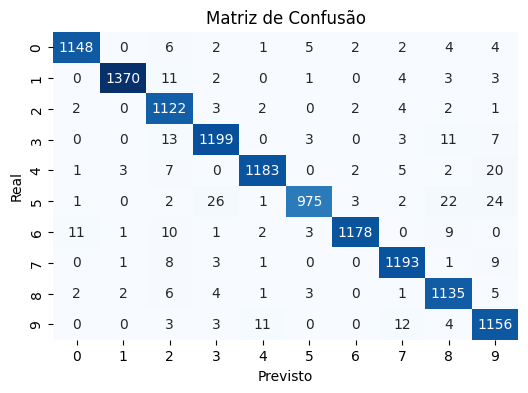

In [87]:
# Função para exibir o relatório e matriz de confusão
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)

    # Exibir relatório de classificação
    print(f"\nResultados para {model_name}:\n", classification_report(y_test, y_pred))
    
    # Exibir acurácia
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Acurácia para {model_name}: {accuracy:.2f}")

    cm = confusion_matrix(y_test,y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Previsto')
    plt.ylabel('Real')
    plt.title('Matriz de Confusão')
    plt.show()

# Avaliando cada modelo com a função

evaluate_model(ANN3, X_test, y_test, 'ANN3')

### Para nosso melhor modelo temos:

### Acurácia: 98%
### Precisão: 98%
### Recall:   98%
### F1-score: 98%

## 🐸 Item b)

Exiba gráficos que mostram a evolução da acurácia e da perda (`Loss`) durante o treinamento do melhor modelo encontrado no item 3c).

### Como ambos os gráficos ja foram plotados em itens anteriores, iremos apenas juntá-los para melhor visualização 

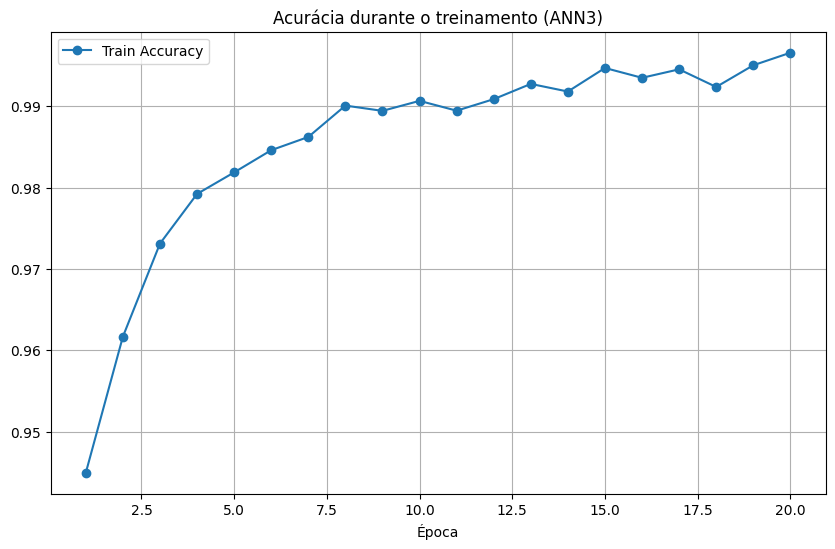

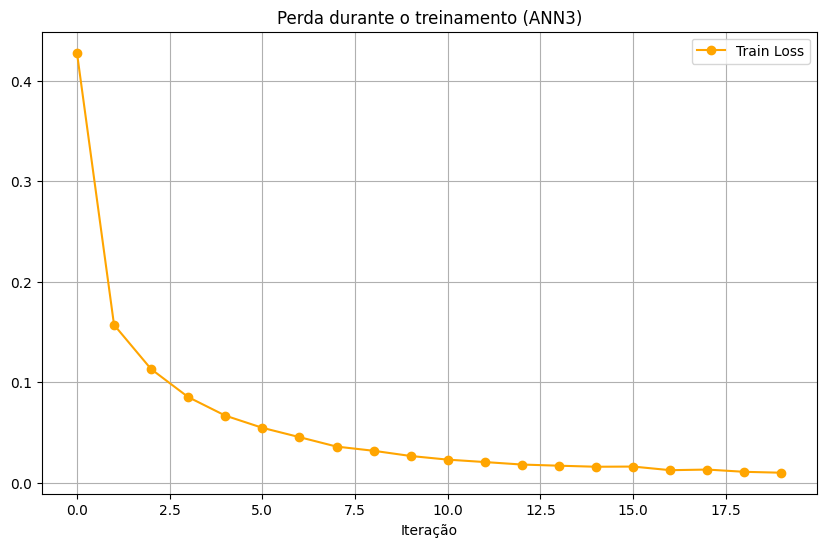

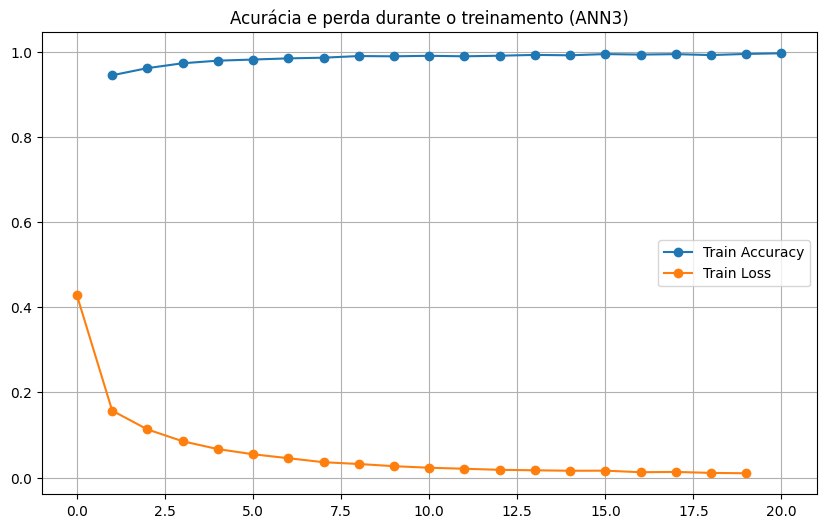

In [ ]:
# Função modificada da anterior para plotar simultâneamente a evolução da acurácia e da perda
def accuracy_loss(hl,epochs,model):

    classes = np.unique(y_train)
    train_accuracy = []

    ANN = MLPClassifier(hidden_layer_sizes=hl, max_iter=1, warm_start=True, random_state=num_hash)

    # Utilizar o partial_fit para fazer um treinamento progressivo do modelo para ter acesso aos
    # dados de cada época
    for epoch in range(epochs):
        ANN.partial_fit(X_train, y_train, classes=classes)
        train_pred = ANN.predict(X_train)
        acc = accuracy_score(y_train, train_pred)
        train_accuracy.append(acc)

    plt.figure(figsize=(10, 6))
    plt.plot(range(1, epochs + 1), train_accuracy, marker='o', label="Train Accuracy")
    plt.title(f"Acurácia durante o treinamento (ANN{model})")
    plt.xlabel("Época")
    plt.legend()
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(10, 6))
    plt.plot(ANN.loss_curve_, marker='o', label="Train Loss",color="orange")
    plt.title(f"Perda durante o treinamento (ANN{model})")
    plt.xlabel("Iteração")
    plt.legend()
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(10, 6))
    plt.plot(range(1, epochs + 1), train_accuracy, marker='o', label="Train Accuracy")
    plt.plot(ANN.loss_curve_, marker='o', label="Train Loss")
    plt.title(f"Acurácia e perda durante o treinamento (ANN{model})")
    plt.legend()
    plt.grid(True)
    plt.show()

accuracy_loss((128,64,128),20,3)


## 🦖 Item c)

Escolha algumas imagens do conjunto de teste e mostre previsões do seu modelo, com acertos e erros. Discuta quais fatores podem ter contribuído para essas previsões corretas e incorretas.

In [115]:
# Primeiro iremos criar um array que nos possibilita saber quais imagens foram erradas
y_pred = ANN3.predict(X_test)

previsao = y_pred == y_test # False = imagem rotulada errada

previsao


array([ True,  True,  True, ...,  True,  True,  True])

In [151]:
# Como visto na matriz de confusão, os valores que mais ocorreram erro foram:
# 5 rotulado como 9
# 5 rotulado como 3
# 5 rotulado como 8
# E portanto iremos trabalhar nossa análise em cima desses casos


acerto5 = np.where((y_pred == 5) & (previsao == True))[0] # imagens de rótulo 5 que foram rotuladas com 5
erro9 = np.where((y_pred == 9) & (y_test == 5))[0] # imagens de rótulo 4 que foram rotuladas com 4
erro8 = np.where((y_pred == 8) & (y_test == 5))[0] # imagens de rótulo 4 que foram rotuladas com 4
erro3 = np.where((y_pred == 3) & (y_test == 5))[0] # imagens de rótulo 8 que foram rotuladas com 8


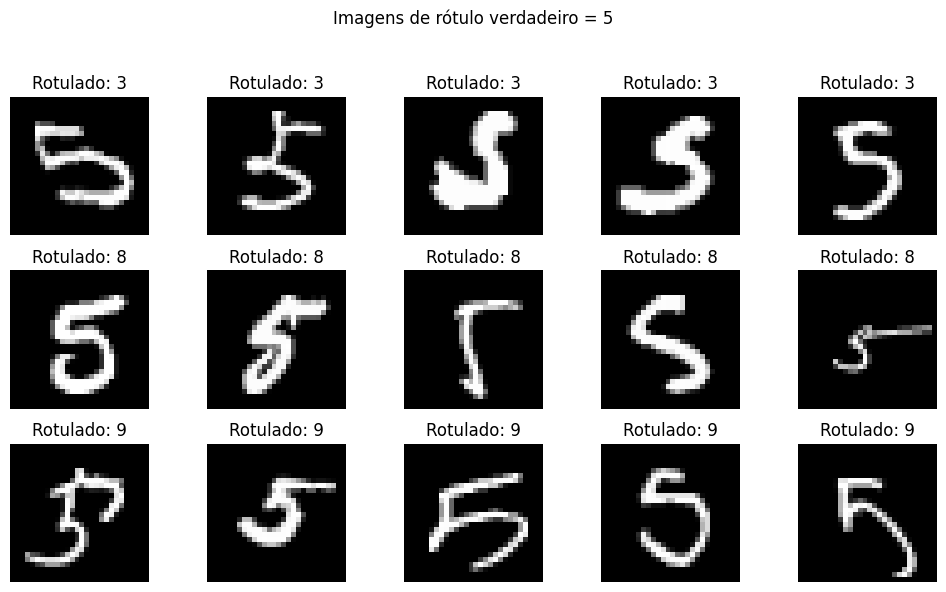

In [161]:
# Plotaremos 15 imagens, 5 para cada caso anteriormente dito, 
# visando comparar e compreender o que gerou os erros

# Configuração do gráfico
plt.figure(figsize=(10, 6))
plt.suptitle("Imagens de rótulo verdadeiro = 5")

rows = 3
cols = 5

for x in range(5):  # Itera sobre as imagens e títulos
    # Imagem 5 rotulada como 3
    image = X_test[erro3[x]].reshape(28, 28)
    plt.subplot(rows, cols, x + 1)  # Posição do subplot para erro3
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray)
    plt.title(f"Rotulado: {y_pred[erro3[x]]}")

    # Imagem 5 rotulada como 8
    image2 = X_test[erro8[x]].reshape(28, 28)
    plt.subplot(rows, cols, x + 6)  # Posição do subplot para erro8
    plt.axis('off')
    plt.imshow(image2, cmap=plt.cm.gray)
    plt.title(f"Rotulado: {y_pred[erro8[x]]}")

    # Imagem 5 rotulada como 9
    image3 = X_test[erro9[x]].reshape(28, 28)
    plt.subplot(rows, cols, x + 11)  # Posição do subplot para erro9
    plt.axis('off')
    plt.imshow(image3, cmap=plt.cm.gray)
    plt.title(f"Rotulado: {y_pred[erro9[x]]}")

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Ajusta layout para dar espaço ao título
plt.show()  # Exibe a figura com as imagens e títulos


### Como pode ser observado, possivelmente houve uma maior incidência de erro na classe 5 por conta da semelhança visual com os outros dígitos:

### O número 3 pode ser confundível com um 5 por conta das 3 linhas/curvas horizontais e o meio-círculo inferior;

### O número 8, semelhante ao 3 (também houveram muitos erros entre eles!), se assimila ao 5 por conta do formato esférico na parte inferior do dígito, mas nesse caso também pela presença na parte superior;

### O número 9 é facilmente relacionado com o número 5, dado que ele pode ser desenhado apenas fechando a parte superior do dígito 5 em questão;

---

# 5️⃣ Tarefa 05: Lembrete *Kaggle* e Documentação 🗃️

## 😮‍💨 Item a)

# Lembre-se de publicar no *Kaggle* com o título correto e padronizado!

In [170]:
# Submissão no kaggle
hidden_layers = (128, 64, 128) # Camadas ocultas
epochs = 20 # épocas para serem realizadas

# Treinamento do modelo final com todos os dados e os parâmetros do melhor encontrado
ANNF = MLPClassifier(hidden_layer_sizes=hidden_layers, max_iter=epochs, random_state=num_hash)
ANNF.fit(X_tot.reshape(-1,28 * 28) / 255, y_tot)

#
output = ANNF.predict(X_val.reshape(-1,28 * 28) / 255)


In [171]:
df = pd.DataFrame({'ID': np.arange(1,10001), 'Answer':output})
df.set_index("ID", inplace=True)
df.to_csv('submission.csv')
df.head()

,Answer
ID,
1,8
2,4
3,8
4,7
5,7


## 🙏🏻 Item b)

# Lembre-se de documentar adequadamente seu código e conclusões!